# 상관관계
**[수업 목표]**
- 상관관계에 대해서 이해한다
- 다양한 상관관계 계산의 특징과 차이점을 이해하고 적용할 수 있다

## 5.1 피어슨 상관계수
두 연속형 변수 간의 선형 관계를 측정하는 지표
### 선형적인 관계가 예상 될 때
- 공부 시간과 시험 점수 간의 상관관계 분석

### 비선형 관계에선 사용할 수 없음

피어슨 상관계수: 0.8642702080660165


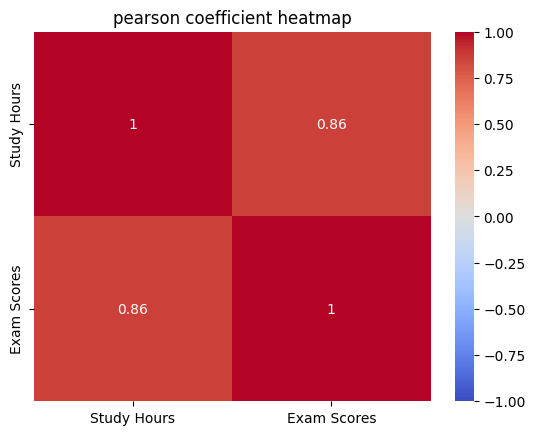

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 예시 데이터 생성
np.random.seed(0)
study_hours = np.random.rand(100) * 10
exam_scores = 3 * study_hours + np.random.randn(100) * 5

# 데이터프레임 생성
df = pd.DataFrame({'Study Hours': study_hours, 
'Exam Scores': exam_scores})

# 피어슨 상관계수 계산
pearson_corr, _ = pearsonr(df['Study Hours'], df['Exam Scores'])
print(f"피어슨 상관계수: {pearson_corr}")

# 상관관계 히트맵 시각화
#sns.heatmap(df.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#heatmap에서 annot는 값 레이블을 히트맵 위에 표시할 수 있도록 해주는 파라미터입니다. 이를 설정하면 각 셀에 해당하는 값이 화면에 나타나, 데이터를 쉽게 읽고 비교할 수 있게 도와줍니다.
plt.title('pearson coefficient heatmap')
plt.show()

## 5.2 비모수 상관계수
데이터가 정규분포를 따르지 않거나 변수들이 순서형 데이터일 때 사용하는 상관계수
### 데이터의 분포에 대한 가정을 하지 못할 때
### 순서형 데이터에서도 사용하고 싶을 때

스피어만 상관계수: 0.8663546354635462
켄달의 타우 상관계수: 0.6690909090909092


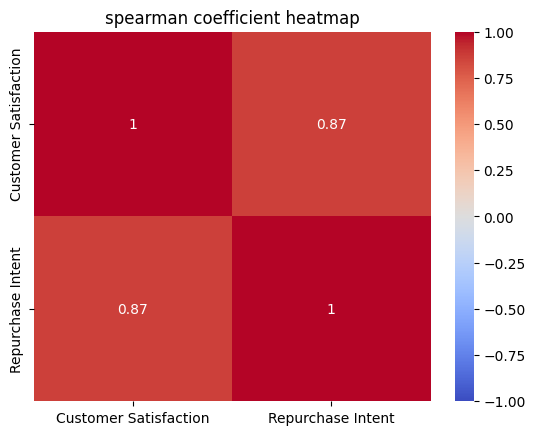

In [3]:
from scipy.stats import spearmanr, kendalltau

# 예시 데이터 생성
np.random.seed(0)
customer_satisfaction = np.random.rand(100)
repurchase_intent = 3 * customer_satisfaction + np.random.randn(100) * 0.5

# 데이터프레임 생성
df = pd.DataFrame({'Customer Satisfaction': customer_satisfaction, 'Repurchase Intent': repurchase_intent})

# 스피어만 상관계수 계산
spearman_corr, _ = spearmanr(df['Customer Satisfaction'], df['Repurchase Intent'])
# _ 는 유의성 검정에서 배웠던 p 값. 0.05 이하를 가지면 의미가 있다.
print(f"스피어만 상관계수: {spearman_corr}")

# 켄달의 타우 상관계수 계산
kendall_corr, _ = kendalltau(df['Customer Satisfaction'], df['Repurchase Intent'])
print(f"켄달의 타우 상관계수: {kendall_corr}")

# 상관관계 히트맵 시각화
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('spearman coefficient heatmap')
plt.show()

## 5.3 상호정보 상관계수
상호정보를 이용한 변수끼리의 상관계수 계산!
### 두 변수가 범주형 변수일 때
### 비선형적이고 복잡한 관계를 탐지하고자 할 때

In [5]:
import numpy as np
from sklearn.metrics import mutual_info_score

# 범주형 예제 데이터
X = np.array(['cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat'])
Y = np.array(['high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'low', 'high'])

# 상호 정보량 계산
mi = mutual_info_score(X, Y)
print(f"Mutual Information (categorical): {mi}")

Mutual Information (categorical): 0.6931471805599456


##